## Univariate Analysis

In [1]:
import pandas as pd
# load the csv file of data
df_suicide = pd.read_csv('suicide_data.csv')

# display the head() of the dataset
df_suicide.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [3]:
df_suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Consider the variable 'gdp_per_capita' for univariate analysis

#### In our data, 'gdp_per_capita' is a numerical variable. Thus, we can use different visualization techniques (histogram, boxplot, violinplot, and so on) to study the distribution of the variable.

### Histogram - [Kindly Provide the Inferences]

In [4]:
# Plot the histogram 
import matplotlib.pyplot as plt

(array([2760., 2880., 2470., 2038., 1344., 1066., 1212.,  694.,  716.,
         744.,  752.,  732.,  538.,  516.,  396.,  358.,  420.,  480.,
         492.,  430.,  564.,  396.,  432.,  420.,  288.,  300.,  228.,
         216.,  132.,  252.,  192.,  168.,  144.,  180.,  228.,  192.,
         108.,  200.,  144.,  228.,  156.,  108.,  144.,  190.,  156.,
          24.,   48.,   96.,   36.,   46.,   24.,   58.,   72.,   12.,
          24.,   24.,   24.,   24.,   36.,    0.,   24.,    0.,   36.,
          24.,   12.,   12.,   12.,   24.,   12.,   24.,   12.,   36.,
          12.,   36.,   12.,   12.,    0.,    0.,    0.,    0.,    0.,
          24.,    0.,    0.,   12.,   24.,   24.,    0.,   12.,   24.,
           0.,    0.,    0.,    0.,    0.,   12.,   12.,   12.,    0.,
          12.]),
 array([   251.  ,   1512.01,   2773.02,   4034.03,   5295.04,   6556.05,
          7817.06,   9078.07,  10339.08,  11600.09,  12861.1 ,  14122.11,
         15383.12,  16644.13,  17905.14,  19166.15,  2

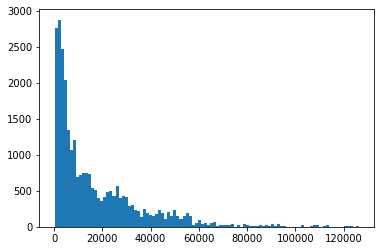

In [5]:
plt.hist(df_suicide['gdp_per_capita ($)'],bins=100)

### Inferences: The histogram appears right-skewed. 

In [6]:
df_suicide['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

In [7]:
df_suicide['gdp_per_capita ($)'].mode()

0    1299
1    2303
2    4104
dtype: int64

In [8]:
df_suicide['gdp_per_capita ($)'].median()

9372.0

In [9]:
df_suicide['gdp_per_capita ($)'].skew()

1.9634699942792686

### Distribution plot: Use distplot() to plot a kernel density estimator (KDE) along with the histogram to study the distribution of the data

In [10]:
import seaborn as sns

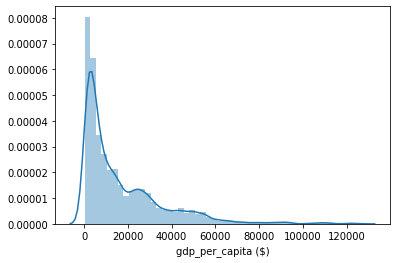

In [11]:
# Plot the distribution plot
sns.distplot(df_suicide['gdp_per_capita ($)'])

### Violin plot: It is similar to a boxplot which shows the distribution of the quantitative variable

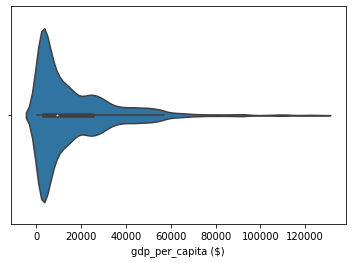

In [12]:
# plot the violin plot
sns.violinplot(df_suicide['gdp_per_capita ($)'])

### Boxplot: Boxplot can be used to visualize the presence of outliers in the data. In boxplot, the observation will be an outlier, if it is outside the specific range (1.5 times IQR above the third quartile and below the first quartile)

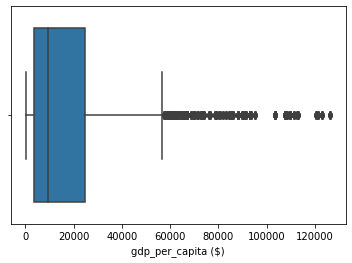

In [13]:
#Plot the Box plot
sns.boxplot(df_suicide['gdp_per_capita ($)'])

# Multivariate Analysis

### Grouped boxplot : It is used to compare the distribution of different categories in the categorical variable. Plot a grouped boxplot to check the extreme values for the population in the different generations

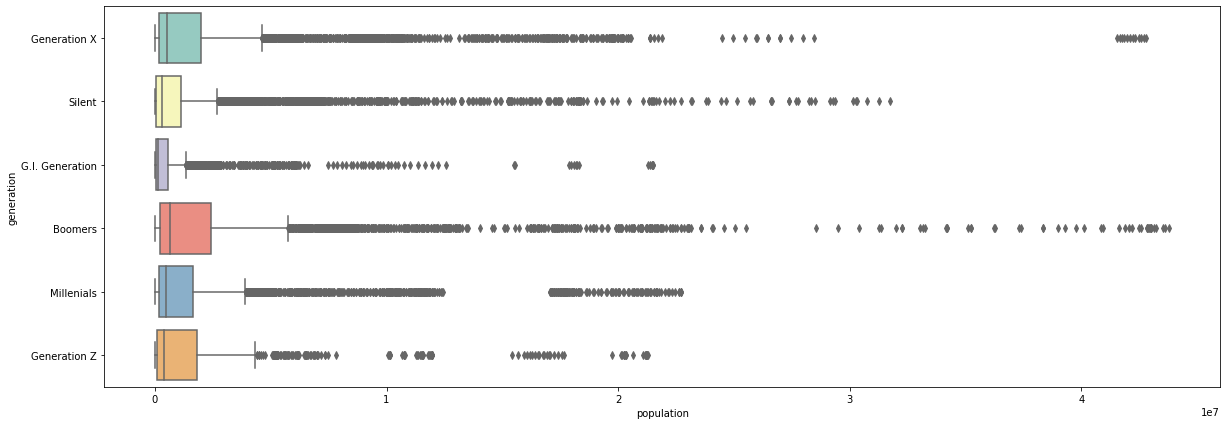

In [14]:
# Plot a Groped Box plot
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(ax=ax, x="population",y="generation",data=df_suicide, linewidth=1.5 ,palette="Set3")

## Heat Map

In [15]:
#visualize the correlation matrix using the heatmap.
df_suicide_copy=df_suicide.copy().drop(columns=["HDI for year","country","age","country-year"])
list(df_suicide_copy.columns) 

['year',
 'sex',
 'suicides_no',
 'population',
 'suicides/100k pop',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [16]:
df_suicide_copy['sex'] = df_suicide_copy['sex'].replace('male',0).replace('female',1).astype('int32')
df_suicide_copy['generation'] = df_suicide_copy['generation'].replace('Generation X',0).replace('Silent',1).replace('G.I. Generation',2).replace('Boomers',3).replace('Millenials',4).replace('Generation Z',5).astype('int32')
df_suicide_copy.head()

,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,1987,0,21,312900,6.71,"2,156,624,900",796,0
1,1987,0,16,308000,5.19,"2,156,624,900",796,1
2,1987,1,14,289700,4.83,"2,156,624,900",796,0
3,1987,0,1,21800,4.59,"2,156,624,900",796,2
4,1987,0,9,274300,3.28,"2,156,624,900",796,3


In [18]:
df_suicide_copy[' gdp_for_year ($) '] = df_suicide_copy[' gdp_for_year ($) '].str.replace(',','').astype('float64')


In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax=sns.heatmap(df_suicide_copy.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
ax.set_ylim(8.0, 0)